In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=81808b21f8511f6d0ae1d28dfdb27236c8e460ee3935988fecb3bc96d72bc263
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


/usr/local/lib/python3.10/dist-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


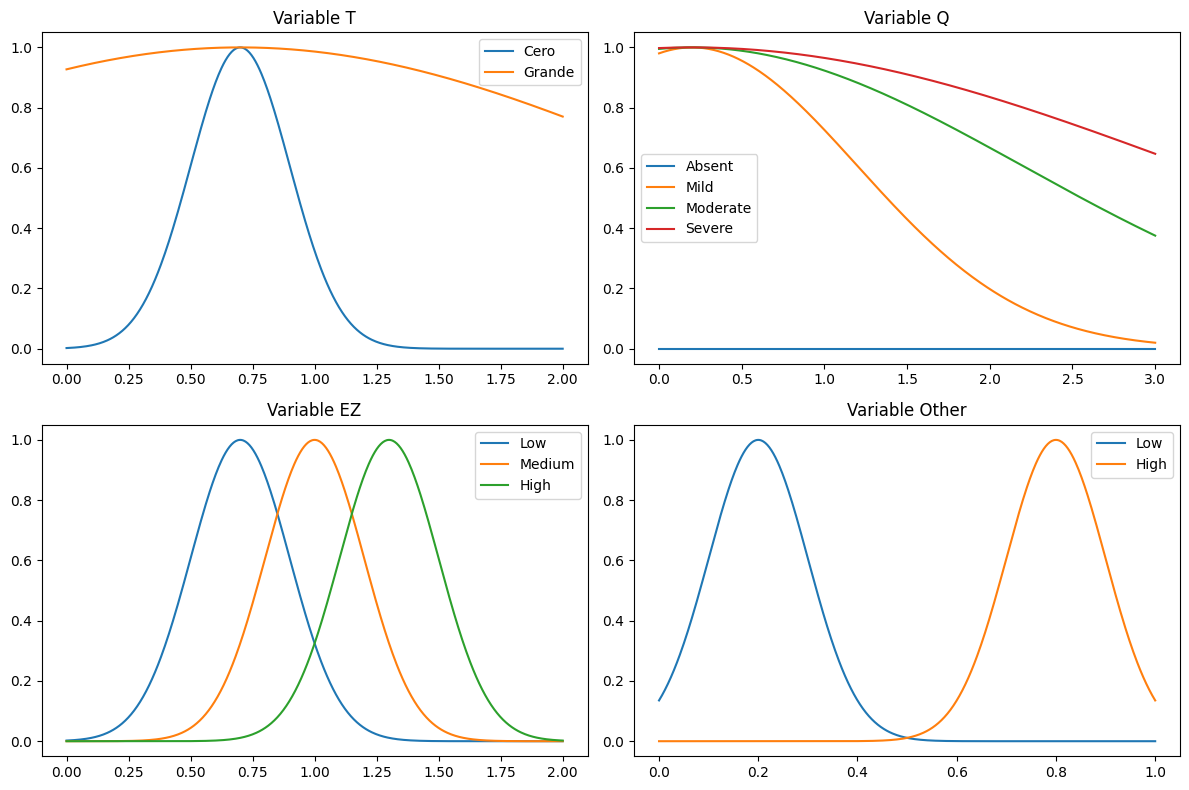

In [ ]:
# Import the required libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse for the input variables
# For variable T with range [0, 2]
T = np.linspace(0, 2, 500)
# For variable Q with range [0, 3]
Q = np.linspace(0, 3, 500)
# For variable EZ with range [0, 2]
EZ = np.linspace(0, 2, 500)
# (Assuming another variable with range [0, 1])
Drill = np.linspace(0, 1, 500)

# Define membership functions for T
T_cero = fuzz.gaussmf(T, 0.7, 0.2)
T_grande = fuzz.gaussmf(T, 0.7, 1.8)

# Define membership functions for Q
Q_absent = fuzz.gaussmf(Q, 0.2, 0)
Q_mild = fuzz.gaussmf(Q, 0.2, 1)
Q_moderate = fuzz.gaussmf(Q, 0.2, 2)
Q_severe = fuzz.gaussmf(Q, 0.2, 3)

# Define membership functions for EZ
EZ_low = fuzz.gaussmf(EZ, 0.7, 0.2)
EZ_medium = fuzz.gaussmf(EZ, 1, 0.2)
EZ_high = fuzz.gaussmf(EZ, 1.3, 0.2)

# Define membership functions for Other (Assuming Gaussian MFs)
Drill_low = fuzz.gaussmf(Drill, 0.2, 0.1)
Drill_high = fuzz.gaussmf(Drill, 0.8, 0.1)

# Plot membership functions for visualization (Optional)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(T, T_cero, label='Cero')
plt.plot(T, T_grande, label='Grande')
plt.title('Variable T')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(Q, Q_absent, label='Absent')
plt.plot(Q, Q_mild, label='Mild')
plt.plot(Q, Q_moderate, label='Moderate')
plt.plot(Q, Q_severe, label='Severe')
plt.title('Variable Q')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(EZ, EZ_low, label='Low')
plt.plot(EZ, EZ_medium, label='Medium')
plt.plot(EZ, EZ_high, label='High')
plt.title('Variable EZ')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(Other, Other_low, label='Low')
plt.plot(Other, Other_high, label='High')
plt.title('Variable DRILL')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

sigma = 0.0001

# Paso 1: Definición del espacio lineal para las variables de entrada

# Variable T con rango [0, 2]
T = np.linspace(0, 2, 500)
# Variable Q con rango [0, 3]
Q = np.linspace(0, 3, 500)
# Variable EZ con rango [0, 2]
EZ = np.linspace(0, 2, 500)
# Variable DRIL con rango [0, 2]
DRIL = np.linspace(0, 2, 500)

# Paso 2: Definir las funciones de pertenencia para cada variable de entrada

# Funciones de pertenencia para T
T_cero = fuzz.gaussmf(T, 0.7, 0.2)
T_grande = fuzz.gaussmf(T, 0.7, 1.8)

# Funciones de pertenencia para Q
Q_absent = fuzz.gaussmf(Q, 0.2, sigma)
Q_mild = fuzz.gaussmf(Q, 0.2, 1)
Q_moderate = fuzz.gaussmf(Q, 0.2, 2)
Q_severe = fuzz.gaussmf(Q, 0.2, 3)

# Funciones de pertenencia para EZ
EZ_intact = fuzz.gaussmf(EZ, 0.2, sigma)
EZ_disrupted = fuzz.gaussmf(EZ, 0.2, 1)
EZ_absent = fuzz.gaussmf(EZ, 0.2, 2)

# Funciones de pertenencia para DRIL
DRIL_without = fuzz.gaussmf(DRIL, 0.7, 0.2)
DRIL_with = fuzz.gaussmf(DRIL, 0.7, 1.8)

# Paso 3: Definir las reglas de inferencia

# Ejemplo de reglas
# Definir la variable de salida (nivel de retinopatía)
output_range = np.linspace(0, 4, 500)
output_temprana = fuzz.trimf(output_range, [0, 0.5, 1])
output_avanzada = fuzz.trimf(output_range, [1, 1.5, 2])
output_severa = fuzz.trimf(output_range, [2, 2.5, 3])
output_atrofica = fuzz.trimf(output_range, [3, 3.5, 4])

# Definir las reglas de inferencia
rule_temprana = np.fmin(T_cero, np.fmin(Q_absent, np.fmin(EZ_intact, DRIL_without)))
rule_avanzada = np.fmin(T_cero, np.fmin(Q_mild, np.fmin(EZ_intact, DRIL_without)))
rule_severa = np.fmin(T_grande, np.fmin(Q_mild, np.fmin(EZ_disrupted, DRIL_with)))
rule_atrofica = np.fmin(T_grande, np.fmin(Q_severe, np.fmin(EZ_absent, DRIL_with)))

# Paso 4: Agregar todas las funciones de membresía de salida

# Agregar las reglas
# Combina todas las reglas para obtener la salida difusa
aggregated = np.fmax(rule_temprana, np.fmax(rule_avanzada, np.fmax(rule_severa, rule_atrofica)))

# Paso 5: Defuzzificación para obtener un resultado claro
result = fuzz.defuzz(output_range, aggregated, 'centroid') # Usando el método del centroide para la defuzzificación

# Ahora, 'result' contendrá el resultado defuzzificado basado en tus reglas.
print("Resultado defuzzificado:", result)

# Paso 6: Evaluar el sistema con un conjunto de datos

# Datos de entrada y observaciones
input_data = np.array([
    [0.3, 1.0, 0.1, 0.2],
    [1.5, 2.0, 1.0, 1.8],
    [1.0, 3.0, 1.5, 0.8],
    [0.2, 0.5, 0.0, 0.1]
])
observed_values = np.array([0.5, 2.0, 1.5, 0.2])

# Función para evaluar el sistema difuso (esto es un ejemplo, deberás adaptarlo)
def evaluate_fuzzy_system(input_row):
    # Descomponer la fila de entrada en sus componentes
    t_val, q_val, ez_val, dril_val = input_row

    # Evaluar las funciones de membresía de entrada
    t_cero_val = fuzz.interp_membership(T, T_cero, t_val)
    t_grande_val = fuzz.interp_membership(T, T_grande, t_val)

    # Evaluación de funciones de membresía para Q
    q_absent_val = fuzz.interp_membership(Q, Q_absent, q_val)
    q_mild_val = fuzz.interp_membership(Q, Q_mild, q_val)
    q_moderate_val = fuzz.interp_membership(Q, Q_moderate, q_val)
    q_severe_val = fuzz.interp_membership(Q, Q_severe, q_val)

    # Evaluación de funciones de membresía para EZ
    ez_intact_val = fuzz.interp_membership(EZ, EZ_intact, ez_val)
    ez_disrupted_val = fuzz.interp_membership(EZ, EZ_disrupted, ez_val)
    ez_absent_val = fuzz.interp_membership(EZ, EZ_absent, ez_val)

    # Evaluación de funciones de membresía para DRIL
    dril_without_val = fuzz.interp_membership(DRIL, DRIL_without, dril_val)
    dril_with_val = fuzz.interp_membership(DRIL, DRIL_with, dril_val)

    # Evaluación de reglas de inferencia
    rule_temprana_val = np.fmin(t_cero_val, np.fmin(q_absent_val, np.fmin(ez_intact_val, dril_without_val)))
    rule_avanzada_val = np.fmin(t_cero_val, np.fmin(q_mild_val, np.fmin(ez_intact_val, dril_without_val)))
    rule_severa_val = np.fmin(t_grande_val, np.fmin(q_moderate_val, np.fmin(ez_disrupted_val, dril_with_val)))
    rule_atrofica_val = np.fmin(t_grande_val, np.fmin(q_severe_val, np.fmin(ez_absent_val, dril_with_val)))

    # Agregar las funciones de membresía de salida para cada regla
    aggregated_val = np.fmax(rule_temprana_val, np.fmax(rule_avanzada_val, np.fmax(rule_severa_val, rule_atrofica_val)))

    # Realizar la defuzzificación
    print(output_range, aggregated_val)
    #result = fuzz.defuzz(output_range, aggregated_val, 'centroid')

    return result


# Lista para almacenar los valores predichos
predicted_values = []

# Iterar a través de todas las filas de datos de entrada
for row in input_data:
    predicted_value = evaluate_fuzzy_system(row)
    predicted_values.append(predicted_value)

# Convertir la lista de valores predichos a un array de NumPy
predicted_values = np.array(predicted_values)

# Calcular el MSE (Error Cuadrático Medio)
MSE = np.mean((observed_values - predicted_values)**2)

# Imprimir el MSE
print("MSE:", MSE)

Resultado defuzzificado: 1.874307321510705
[0.         0.00801603 0.01603206 0.0240481  0.03206413 0.04008016
 0.04809619 0.05611222 0.06412826 0.07214429 0.08016032 0.08817635
 0.09619238 0.10420842 0.11222445 0.12024048 0.12825651 0.13627255
 0.14428858 0.15230461 0.16032064 0.16833667 0.17635271 0.18436874
 0.19238477 0.2004008  0.20841683 0.21643287 0.2244489  0.23246493
 0.24048096 0.24849699 0.25651303 0.26452906 0.27254509 0.28056112
 0.28857715 0.29659319 0.30460922 0.31262525 0.32064128 0.32865731
 0.33667335 0.34468938 0.35270541 0.36072144 0.36873747 0.37675351
 0.38476954 0.39278557 0.4008016  0.40881764 0.41683367 0.4248497
 0.43286573 0.44088176 0.4488978  0.45691383 0.46492986 0.47294589
 0.48096192 0.48897796 0.49699399 0.50501002 0.51302605 0.52104208
 0.52905812 0.53707415 0.54509018 0.55310621 0.56112224 0.56913828
 0.57715431 0.58517034 0.59318637 0.6012024  0.60921844 0.61723447
 0.6252505  0.63326653 0.64128257 0.6492986  0.65731463 0.66533066
 0.67334669 0.681362

In [ ]:
import numpy as np
import pandas as pd

# Configurar los rangos para las variables de entrada y la variable de salida
rango_thickness = [0, 2]
rango_cyst = [0, 3]
rango_ez = [0, 2]
rango_dril = [0, 2]
rango_retinopatia = [0, 4]

# Generar 100 datos de ejemplo aleatorios
num_muestras = 100

thickness = np.random.uniform(rango_thickness[0], rango_thickness[1], num_muestras)
cyst = np.random.uniform(rango_cyst[0], rango_cyst[1], num_muestras)
ez = np.random.uniform(rango_ez[0], rango_ez[1], num_muestras)
dril = np.random.uniform(rango_dril[0], rango_dril[1], num_muestras)

# Simular el "Nivel de retinopatía observado" como una combinación lineal de las variables de entrada más ruido
retinopatia_observada = 0.3 * thickness + 0.4 * cyst + 0.2 * ez + 0.1 * dril + np.random.normal(0, 0.1, num_muestras)
retinopatia_observada = np.clip(retinopatia_observada, rango_retinopatia[0], rango_retinopatia[1])  # Asegurar que los valores estén dentro del rango

# Crear un DataFrame para almacenar los datos
df = pd.DataFrame({
    'Thickness': thickness,
    'Cyst': cyst,
    'EZ': ez,
    'DRIL': dril,
    'Nivel de retinopatía observado': retinopatia_observada
})

# Mostrar algunas filas del DataFrame
df


,Thickness,Cyst,EZ,DRIL,Nivel de retinopatía observado
0,1.796109,2.743236,1.597566,1.360282,2.129166
1,0.410279,1.256312,1.995868,1.237223,1.072764
2,0.381375,1.149416,0.701424,1.505433,0.729180
3,0.073099,1.556753,1.534377,0.317210,0.951618
4,0.944134,0.140898,0.803862,1.761742,0.602463
...,...,...,...,...,...
95,1.747780,2.610297,1.701163,1.841696,2.116375
96,1.194826,0.063808,1.734588,1.233301,0.738662
97,1.201034,2.624105,1.416726,1.593075,1.884527
98,1.330073,1.586811,1.674027,0.963045,1.502284


In [ ]:
# Convertir el DataFrame a un formato similar al del script de MATLAB
observaciones_str = "observaciones = [" + "; ".join(df['Nivel de retinopatía observado'].apply(str)) + "];"
entradas_str = "entradas = [\n" + "\n".join(df.drop('Nivel de retinopatía observado', axis=1).apply(lambda row: ' '.join(row.map(str)), axis=1)) + "\n];"

matlab_format_str = f"% Observaciones del nivel de retinopatía\n{observaciones_str}\n{entradas_str}"
matlab_format_str # Mostrar solo los primeros 500 caracteres para dar una idea del formato

'% Observaciones del nivel de retinopatía\nobservaciones = [2.129166151269877; 1.072764382326233; 0.7291798007174739; 0.9516175968356748; 0.6024626036827779; 0.9033347729964782; 1.022776700513287; 1.1357792735682617; 1.351702689853554; 1.0829614532799043; 1.0197308651589259; 0.7850461961320764; 1.203914296132547; 1.1491209586683644; 0.8586140752769638; 1.2902963605633357; 1.4135851354622806; 1.1529367254542346; 1.6135359662106066; 1.4565734402467718; 0.5598615493641506; 0.5174412000201262; 0.6611825507556239; 1.4130476418455338; 0.9905230103533565; 0.849143918845523; 1.390121383041744; 1.2250364625137522; 1.3447372579894463; 0.43706693867069946; 0.6637648182324454; 1.7435570686346014; 1.0582214819155278; 1.5274845320058323; 0.7646244937100592; 0.705744161645079; 1.4620174678220477; 1.8455530244894358; 1.6740001158848838; 1.0924790806208993; 1.3033964822089017; 0.8555815581594076; 0.6590056516876193; 1.5953497790440259; 1.0096610392686334; 1.6779946425024195; 0.6946330703480391; 0.63058

In [ ]:
import pandas as pd

# Inicializar el generador de números aleatorios
np.random.seed(42)

# Número de ejemplos
n = 300

# Inicializar matrices para almacenar las variables y etapas
variables = np.zeros((n, 4))
stages = []

# Generar datos de ejemplo
for i in range(n):
    # Generar un número aleatorio para decidir la etapa
    stage_choice = np.random.choice(["Early DME", "Advanced DME", "Severe DME", "Atrophic maculopathy"])

    if stage_choice == "Early DME":
        variables[i] = np.random.choice([0, 1], 4)  # Valores bajos en todas las variables
    elif stage_choice == "Advanced DME":
        variables[i] = np.random.choice([1, 2], 4)  # Valores moderados en todas las variables
    elif stage_choice == "Severe DME":
        variables[i] = np.random.choice([1, 2, 3], 4)  # Valores altos en todas las variables
    elif stage_choice == "Atrophic maculopathy":
        variables[i] = np.random.choice([0, 2, 3], 4)  # Una combinación de valores extremos

    stages.append(stage_choice)

# Crear un DataFrame de Pandas
df = pd.DataFrame(variables, columns=["Thickening (T)", "Cysts (C)", "EZ and/or ELM status (E)", "DRIL (D)"])
df["Stage"] = stages

# Mostrar las primeras 10 filas del DataFrame
df.head(10)

,Thickening (T),Cysts (C),EZ and/or ELM status (E),DRIL (D),Stage
0,1.0,3.0,3.0,1.0,Severe DME
1,0.0,1.0,0.0,0.0,Early DME
2,3.0,1.0,3.0,2.0,Severe DME
3,1.0,1.0,1.0,1.0,Early DME
4,2.0,2.0,2.0,1.0,Advanced DME
5,1.0,1.0,1.0,0.0,Early DME
6,0.0,0.0,3.0,3.0,Atrophic maculopathy
7,2.0,3.0,2.0,2.0,Severe DME
8,2.0,3.0,3.0,1.0,Severe DME
9,1.0,3.0,3.0,1.0,Severe DME


In [ ]:
# Cambiar las etapas por un número del 1 al 4, según la gravedad del caso
stage_to_number = {
    "Early DME": 1,
    "Advanced DME": 2,
    "Severe DME": 3,
    "Atrophic maculopathy": 4
}

df["Stage"] = df["Stage"].map(stage_to_number)

# Mostrar las primeras 10 filas del DataFrame actualizado
df.head(10)

,Thickening (T),Cysts (C),EZ and/or ELM status (E),DRIL (D),Stage
0,1.0,3.0,3.0,1.0,3
1,0.0,1.0,0.0,0.0,1
2,3.0,1.0,3.0,2.0,3
3,1.0,1.0,1.0,1.0,1
4,2.0,2.0,2.0,1.0,2
5,1.0,1.0,1.0,0.0,1
6,0.0,0.0,3.0,3.0,4
7,2.0,3.0,2.0,2.0,3
8,2.0,3.0,3.0,1.0,3
9,1.0,3.0,3.0,1.0,3


In [ ]:
# Convertir el DataFrame de Pandas a una matriz NumPy
data_matrix = df.to_numpy()

# Separar las variables y las etapas
variables_matrix = data_matrix[:, :-1]
stages_vector = data_matrix[:, -1]

# Convertir a texto en el formato solicitado
variables_str = '\n'.join('    ' + ' '.join(map(str, row)) + ';' for row in variables_matrix)
stages_str = '\n'.join('    ' + str(x) + ';' for x in stages_vector)

variables_matlab_format = f"% Datos de entrada\nentradas = [\n{variables_str}\n];"
stages_matlab_format = f"% Observaciones del nivel de retinopatía\nobservaciones = [\n{stages_str}\n];"

# Mostrar los datos en el formato solicitado
print(variables_matlab_format)
print(stages_matlab_format)

% Datos de entrada
entradas = [
    1.0 3.0 3.0 1.0;
    0.0 1.0 0.0 0.0;
    3.0 1.0 3.0 2.0;
    1.0 1.0 1.0 1.0;
    2.0 2.0 2.0 1.0;
    1.0 1.0 1.0 0.0;
    0.0 0.0 3.0 3.0;
    2.0 3.0 2.0 2.0;
    2.0 3.0 3.0 1.0;
    1.0 3.0 3.0 1.0;
    0.0 1.0 1.0 0.0;
    2.0 2.0 2.0 0.0;
    1.0 2.0 2.0 2.0;
    3.0 1.0 3.0 3.0;
    1.0 2.0 2.0 2.0;
    2.0 2.0 2.0 2.0;
    2.0 2.0 1.0 1.0;
    2.0 2.0 2.0 2.0;
    2.0 2.0 1.0 2.0;
    2.0 3.0 1.0 2.0;
    0.0 0.0 2.0 3.0;
    1.0 1.0 0.0 1.0;
    0.0 0.0 0.0 3.0;
    0.0 0.0 0.0 0.0;
    0.0 3.0 3.0 3.0;
    1.0 0.0 0.0 0.0;
    1.0 2.0 3.0 2.0;
    1.0 0.0 0.0 1.0;
    2.0 0.0 3.0 3.0;
    2.0 1.0 1.0 2.0;
    2.0 3.0 3.0 0.0;
    1.0 3.0 2.0 3.0;
    0.0 1.0 0.0 0.0;
    1.0 1.0 1.0 1.0;
    2.0 2.0 1.0 3.0;
    3.0 1.0 1.0 2.0;
    0.0 0.0 0.0 0.0;
    1.0 1.0 3.0 3.0;
    2.0 2.0 2.0 1.0;
    1.0 1.0 2.0 2.0;
    2.0 2.0 3.0 2.0;
    1.0 3.0 2.0 1.0;
    0.0 0.0 1.0 0.0;
    0.0 0.0 3.0 3.0;
    2.0 1.0 1.0 2.0;
    0.0 0.0 1.0 1.0;
  

In [ ]:
import numpy as np
import pandas as pd

# Inicializar el generador de números aleatorios
np.random.seed(42)

# Número de ejemplos
n = 110

# Reglas de inferencia (Actividad de Red, Número de Intentos de Acceso, Nivel de Intrusión)
# Ahora los datos para "Actividad de Red" y "Número de Intentos de Acceso" van de 0 a 300
ruleList = [
    (0, 100, 1),
    (50, 150, 3),
    (100, 300, 3),
    (150, 0, 1),
    (200, 100, 2),
    (250, 300, 3),
    (300, 0, 1),
    (300, 100, 1),
    (300, 200, 2)
]

# Inicializar matrices para almacenar las variables y niveles de intrusión
variables = np.zeros((n, 2))
intrusion_levels = np.zeros(n)

# Generar datos de ejemplo
for i in range(n):
    # Seleccionar una regla de inferencia aleatoria
    rule_choice = np.random.choice(len(ruleList))
    selected_rule = ruleList[rule_choice]

    # Asignar valores basados en la regla seleccionada
    variables[i] = np.array(selected_rule[:2])
    intrusion_levels[i] = selected_rule[2]

# Crear un DataFrame de Pandas
df = pd.DataFrame(variables, columns=["Network Activity", "Access Attempts"])
df["Intrusion Level"] = intrusion_levels

# Mostrar las primeras 10 filas del DataFrame
df.head(10)


,Network Activity,Access Attempts,Intrusion Level
0,300.0,0.0,1.0
1,150.0,0.0,1.0
2,300.0,100.0,1.0
3,200.0,100.0,2.0
4,300.0,0.0,1.0
5,100.0,300.0,3.0
6,300.0,0.0,1.0
7,300.0,100.0,1.0
8,200.0,100.0,2.0
9,150.0,0.0,1.0


In [ ]:
df

,Network Activity,Access Attempts,Intrusion Level
0,300.0,0.0,1.0
1,150.0,0.0,1.0
2,300.0,100.0,1.0
3,200.0,100.0,2.0
4,300.0,0.0,1.0
...,...,...,...
105,300.0,0.0,1.0
106,300.0,0.0,1.0
107,300.0,200.0,2.0
108,100.0,300.0,3.0


In [ ]:
df.to_csv('trainingData.csv')

In [ ]:
# Convertir el DataFrame de Pandas a una matriz NumPy
data_matrix = df.to_numpy()

# Separar las variables y las etapas
variables_matrix = data_matrix[:, :-1]
stages_vector = data_matrix[:, -1]

# Convertir a texto en el formato solicitado
variables_str = '\n'.join('    ' + ' '.join(map(str, row)) + ';' for row in variables_matrix)
stages_str = '\n'.join('    ' + str(x) + ';' for x in stages_vector)

variables_matlab_format = f"% Datos de entrada\nentradas = [\n{variables_str}\n];"
stages_matlab_format = f"% Observaciones del nivel de intrusión\nobservaciones = [\n{stages_str}\n];"

# Mostrar los datos en el formato solicitado
print(variables_matlab_format)
print(stages_matlab_format)

% Datos de entrada
entradas = [
    300.0 0.0;
    150.0 0.0;
    300.0 100.0;
    200.0 100.0;
    300.0 0.0;
    100.0 300.0;
    300.0 0.0;
    300.0 100.0;
    200.0 100.0;
    150.0 0.0;
    300.0 100.0;
    300.0 100.0;
    100.0 300.0;
    250.0 300.0;
    200.0 100.0;
    50.0 150.0;
    300.0 100.0;
    250.0 300.0;
    50.0 150.0;
    200.0 100.0;
    0.0 100.0;
    250.0 300.0;
    300.0 200.0;
    0.0 100.0;
    100.0 300.0;
    300.0 0.0;
    150.0 0.0;
    300.0 200.0;
    100.0 300.0;
    200.0 100.0;
    100.0 300.0;
    300.0 0.0;
    200.0 100.0;
    300.0 200.0;
    300.0 0.0;
    50.0 150.0;
    150.0 0.0;
    300.0 200.0;
    50.0 150.0;
    300.0 200.0;
    200.0 100.0;
    50.0 150.0;
    150.0 0.0;
    300.0 0.0;
    300.0 100.0;
    100.0 300.0;
    0.0 100.0;
    150.0 0.0;
    50.0 150.0;
    300.0 100.0;
    150.0 0.0;
    50.0 150.0;
    250.0 300.0;
    250.0 300.0;
    150.0 0.0;
    250.0 300.0;
    50.0 150.0;
    50.0 150.0;
    150.0 0.0;
    300.0 10